#### File and Data Field Descriptions

**train.csv** 
Personal records for about two-thirds(~8700) of the passengers, to be used as training data.

* *PassengerId* - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
* *HomePlanet* - The planet the passenger departed from , typically their planet of permanent residence.
* *CryoSleep* - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
* *Cabin* - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
* *Destination* - The planet the passenger will be debarking to.
* *Age* - The age of the passenger.
* *VIP* - Whether the passenger has paid for special VIP service during the voyage.
* *RoomService, FoodCourt, ShoppingMall, Spa, VRDeck* - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
* *Name* - The first and last names of the passenger.
* *Transported* - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

**test.csv**
Personal records for the remaining one-third(~4300) of the passengers, to be used as test data. Your task is to predict the value of Transported for the passengers in this set.

**sample_submission.csv**
A submission file in the correct format.

* *PassengerId* - Id for each passenger in the test set.
* *Transported* - The target. For each passenger, predict either True or False.


#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_context('notebook')

#### Reading and Understanding Data

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.shape, test.shape

((8693, 14), (4277, 13))

In [4]:
# Concat the two to perform same transformations

train['IsTrain'] = True
test['IsTrain'] = False

complete = pd.concat([train, test])
complete

/home/laksie98/opt/anaconda3/envs/av/lib/python3.9/site-packages/IPython/lib/pretty.py:778: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  output = repr(obj)
/home/laksie98/opt/anaconda3/envs/av/lib/python3.9/site-packages/IPython/core/formatters.py:342: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  return method()


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,IsTrain
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,True
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,True
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,True
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,NaN,False
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,NaN,False
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,NaN,False
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,NaN,False


In [5]:
complete.reset_index(inplace=True, drop=True)

In [6]:
complete.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported      object
IsTrain            bool
dtype: object

In [7]:
# Convert to categorical variables

complete = complete.astype({'PassengerId':'category', 'HomePlanet':'category', 'CryoSleep':'category', 'Cabin':'category', 'Destination':'category'
                , 'VIP':'category', 'Name':'category', 'Transported':'category', 'IsTrain':'category'})
complete.dtypes

PassengerId     category
HomePlanet      category
CryoSleep       category
Cabin           category
Destination     category
Age              float64
VIP             category
RoomService      float64
FoodCourt        float64
ShoppingMall     float64
Spa              float64
VRDeck           float64
Name            category
Transported     category
IsTrain         category
dtype: object

In [8]:
complete.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,IsTrain
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,True
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,True
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,True
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,True


#### Univariate Analysis

##### 1. PassengerId

It is given that each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. We can extract the group from this variable

In [9]:
# Create new feature - group
complete['Group'] = complete['PassengerId'].apply(lambda x: x[:4])

In [10]:
complete = complete.astype({'Group':'category'})

In [11]:
complete[['PassengerId', 'Group']]

,PassengerId,Group
0,0001_01,0001
1,0002_01,0002
2,0003_01,0003
3,0003_02,0003
4,0004_01,0004
...,...,...
12965,9266_02,9266
12966,9269_01,9269
12967,9271_01,9271
12968,9273_01,9273


In [13]:
complete['PassengerId'].nunique()

12970

No duplicate rows

##### 2. Group

In [14]:
complete['Group'].nunique()

9280

In [15]:
print('Average number of passengers in a group are {0:5.3f}'.
      format(complete['PassengerId'].nunique()/complete['Group'].nunique()))

Average number of passengers in a group are 1.398


In [16]:
# We can create a variable which denotes Group Size

complete['GroupSize'] = complete.groupby(by = ['Group'])['PassengerId'].transform('count')
complete[['Group', 'GroupSize']]

,Group,GroupSize
0,0001,1
1,0002,1
2,0003,2
3,0003,2
4,0004,1
...,...,...
12965,9266,2
12966,9269,1
12967,9271,1
12968,9273,1


In [17]:
complete['GroupSize'].value_counts()

1    7145
2    2590
3    1506
4     616
5     380
7     329
6     252
8     152
Name: GroupSize, dtype: int64

Question: 
1. Do all members of a group get transported together or not?
2. Do members of groups (size > 1) belong from the same family?

We'll answer these later.

Due to high cardinality, Group variable is not useful for predictions but may be useful in imputing missing values or outliers. GroupSize can be used in predictive models.

##### 3. HomePlanet

In [18]:
complete['HomePlanet'].nunique()

3

In [19]:
complete['HomePlanet'].value_counts()

Earth     6865
Europa    3133
Mars      2684
Name: HomePlanet, dtype: int64

HomePlanet can be One-Hot Encoded

##### 4. CryoSleep

In [20]:
complete['CryoSleep'].value_counts()

False    8079
True     4581
Name: CryoSleep, dtype: int64

Passengers not in cryosleep are almost twice as many as those who are

Can be One-Hot Encoded

##### 5. Cabin

Given: Takes the form deck/num/side, where side can be either P for Port or S for Starboard

In [21]:
complete['Cabin'].nunique()

9825

In [22]:
complete['Cabin'].head()

0    B/0/P
1    F/0/S
2    A/0/S
3    A/0/S
4    F/1/S
Name: Cabin, dtype: category
Categories (9825, object): ['A/0/P', 'A/0/S', 'A/1/P', 'A/1/S', ..., 'T/2/S', 'T/3/P', 'T/3/S', 'T/4/P']

In [23]:
# Extracting the three variables from Cabin

complete['CabinDeck'] = complete['Cabin'].apply(lambda x: x.split('/')[0])
complete['CabinNum'] = complete['Cabin'].apply(lambda x: x.split('/')[1])
complete['CabinSide'] = complete['Cabin'].apply(lambda x: x.split('/')[2])
complete.astype(
    {'CabinDeck': 'category', 'CabinNum': 'category', 'CabinSide': 'category'})

complete[['Cabin', 'CabinDeck', 'CabinNum', 'CabinSide']].head()

,Cabin,CabinDeck,CabinNum,CabinSide
0,B/0/P,B,0,P
1,F/0/S,F,0,S
2,A/0/S,A,0,S
3,A/0/S,A,0,S
4,F/1/S,F,1,S


In [24]:
complete['CabinDeck'].value_counts()

F    4239
G    3781
E    1323
B    1141
C    1102
D     720
A     354
T      11
Name: CabinDeck, dtype: int64

CabinDeck can be One-Hot Encoded

In [25]:
complete['CabinNum'].value_counts()


82      34
4       28
56      28
95      27
31      27
        ..
1848     1
1847     1
1846     1
1844     1
1890     1
Name: CabinNum, Length: 1894, dtype: int64

CabinNum has high cardinality. We can use binning to convert into fewer categories

Cabin Num might be allotted group wise in order for every deck

In [26]:
complete['CabinSide'].value_counts()


S    6381
P    6290
Name: CabinSide, dtype: int64

CabinSide can be One-Hot Encoded and used in modeling

##### 6. Destination

In [27]:
complete['Destination'].nunique()

3

In [28]:
complete['Destination'].value_counts()

TRAPPIST-1e      8871
55 Cancri e      2641
PSO J318.5-22    1184
Name: Destination, dtype: int64

These can be used as a Categorical feature

##### 7. Age

In [29]:
complete['Age'].describe()

count    12700.000000
mean        28.771969
std         14.387261
min          0.000000
25%         19.000000
50%         27.000000
75%         38.000000
max         79.000000
Name: Age, dtype: float64

min = 0?

In [30]:
complete.loc[complete['Age'] < 0.1, ['Age']]

,Age
19,0.0
61,0.0
86,0.0
102,0.0
157,0.0
...,...
12818,0.0
12820,0.0
12851,0.0
12853,0.0


Are these missing values?

In [31]:
complete['Age'].isna().sum()

270

No. Missing values exist apart from these 260 rows. These need to be investigated further.

In [32]:
# Looking at numeric variables
complete.loc[complete['Age'] < 0.1].describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,GroupSize
count,260.0,255.0,257.0,251.0,255.0,251.0,260.000000
mean,0.0,0.0,0.0,0.0,0.0,0.0,3.742308
std,0.0,0.0,0.0,0.0,0.0,0.0,1.554337
min,0.0,0.0,0.0,0.0,0.0,0.0,1.000000
25%,0.0,0.0,0.0,0.0,0.0,0.0,3.000000
50%,0.0,0.0,0.0,0.0,0.0,0.0,3.000000
75%,0.0,0.0,0.0,0.0,0.0,0.0,5.000000
max,0.0,0.0,0.0,0.0,0.0,0.0,8.000000


None of the entries with Age 0 spent anything while on the ship. Did these people not board the ship?

In [33]:
# Looking at non-numeric variables
complete.select_dtypes(exclude = 'number').loc[complete['Age'] < 0.1]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name,Transported,IsTrain,Group,CabinDeck,CabinNum,CabinSide
19,0017_01,Earth,False,G/0/P,TRAPPIST-1e,False,Lyde Brighttt,True,True,0017,G,0,P
61,0067_01,Earth,True,G/10/S,PSO J318.5-22,False,Ninaha Leeves,True,True,0067,G,10,S
86,0092_02,Earth,True,G/9/P,TRAPPIST-1e,False,Stald Hewson,True,True,0092,G,9,P
102,0108_03,Earth,False,G/19/S,TRAPPIST-1e,NaN,Oline Handertiz,True,True,0108,G,19,S
157,0179_02,Earth,False,G/26/P,TRAPPIST-1e,False,Raque Webstephrey,False,True,0179,G,26,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12818,8960_01,Earth,False,G/1444/S,TRAPPIST-1e,False,Benja Solon,NaN,False,8960,G,1444,S
12820,8960_03,Earth,True,G/1444/S,TRAPPIST-1e,False,Andan Solon,NaN,False,8960,G,1444,S
12851,9022_03,Earth,True,F/1748/S,NaN,False,Erice Boyerson,NaN,False,9022,F,1748,S
12853,9025_02,Earth,True,G/1454/S,TRAPPIST-1e,False,Philia Whitersone,NaN,False,9025,G,1454,S


In [34]:
complete.loc[complete['Age'] < 0.1, ['HomePlanet']].value_counts()

HomePlanet
Earth         188
Mars           56
Europa         13
dtype: int64

There doesn't seem to be any particular reason for this anomaly

Let's look at overall distribution

Skew: 0.44
Kurtosis: 0.14


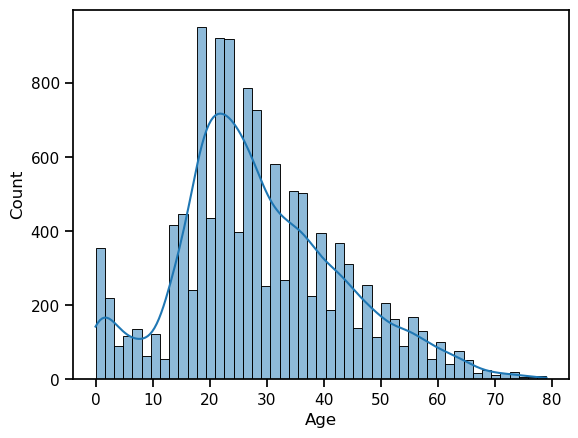

In [35]:
print('Skew: {0:3.2f}'.format(complete['Age'].skew()))
print('Kurtosis: {0:3.2f}'.format(complete['Age'].kurtosis()))

sns.histplot(data = complete, x = 'Age', kde = True);

The distribution is approximately normal

##### 8. VIP

In [36]:
complete['VIP'].value_counts()

False    12401
True       273
Name: VIP, dtype: int64

Highly skewed. Almost everyone is not a VIP

##### 9. Bills - RoomService, FoodCourt, ShoppingMall, Spa, VRDeck

In [37]:
cols = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']


In [38]:
complete[cols].describe()

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,12707.000000,12681.000000,12664.000000,12686.000000,12702.000000
mean,222.897852,451.961675,174.906033,308.476904,306.789482
std,647.596664,1584.370747,590.558690,1130.279641,1180.097223
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,49.000000,77.000000,29.000000,57.000000,42.000000
max,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


All these are heavily right skewed

In [39]:
# Taking log transformation
logcols = []
for i in cols:
    name = 'log_{}'.format(i)
    complete[name] = np.log(complete[i]+1)
    logcols.append(name)

In [40]:
def billsPlotter(data, columnList, hueList = None):
    """
    Description:
    Function to plot distribution of a group of variables

    Parameters:
    data(pandas.core.frame.DataFrame): Pandas Dataframe
    columnList(list) = List of column labels to plot
    hueList(list) = List of column labels to be used as hue

    Return: None
    """
    if hueList:
        fig, axes = plt.subplots(len(hueList), len(columnList), sharey=True, 
            figsize = (len(columnList)*5, len(hueList)*5))

        for i in range(len(hueList)):
            for j in range(len(columnList)):
                sns.histplot(ax=axes[i,j], data=data, x=columnList[j], kde=True, hue=hueList[i])
                axes[i, j].set_title(columnList[j])
    else:
        fig, axes = plt.subplots(1, len(columnList), sharey=True, figsize = (len(columnList)*5, 5))

        for j in range(len(columnList)):
            sns.histplot(ax=axes[j], data=data,
                        x=columnList[j], kde=True)
            axes[j].set_title(columnList[j])
    plt.show
    return None

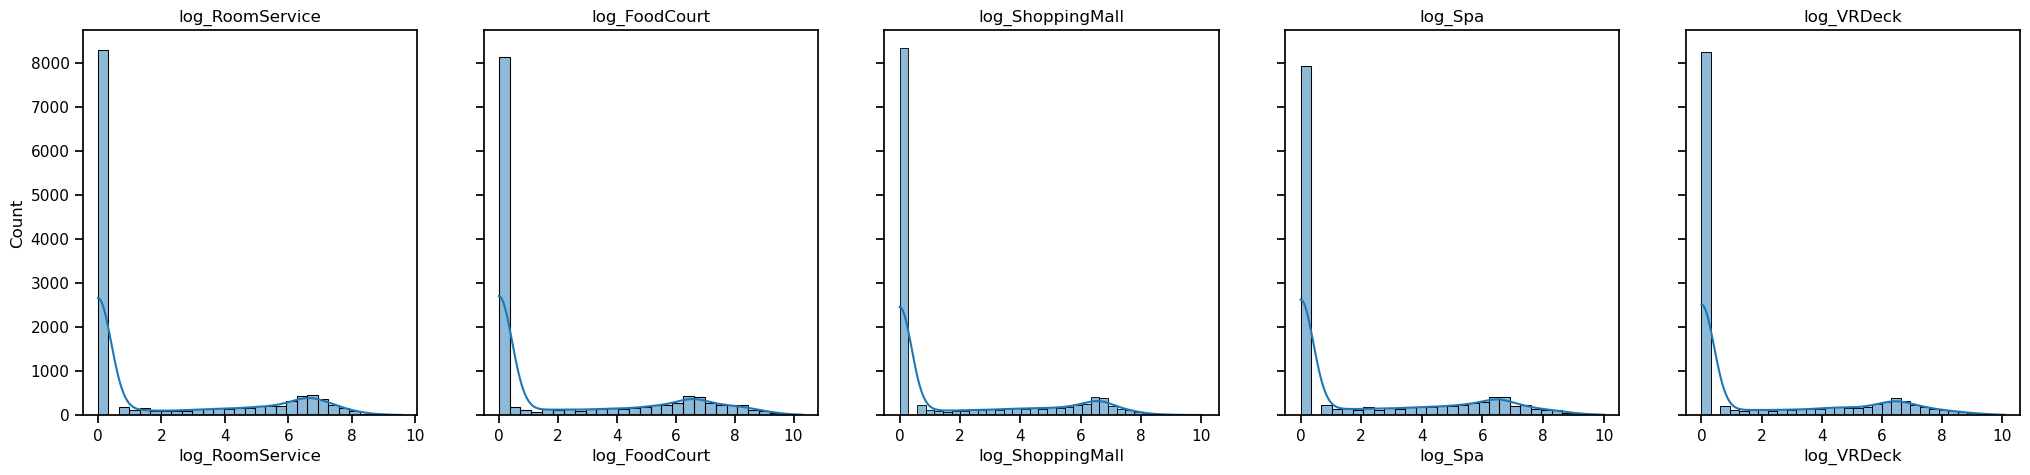

In [41]:
billsPlotter(data = complete, columnList = logcols)

In [42]:
complete[logcols].skew(), complete[logcols].kurtosis()

(log_RoomService     1.110295
 log_FoodCourt       1.108825
 log_ShoppingMall    1.193605
 log_Spa             1.093918
 log_VRDeck          1.182601
 dtype: float64,
 log_RoomService    -0.466104
 log_FoodCourt      -0.403134
 log_ShoppingMall   -0.218285
 log_Spa            -0.389457
 log_VRDeck         -0.188987
 dtype: float64)

The data is still quite skewed. It might be beneficial to take another log.

In [43]:
# Taking log transformation
loglogcols = []
for i in logcols:
    name = 'log_{}'.format(i)
    complete[name] = np.log(complete[i]+1)
    loglogcols.append(name)


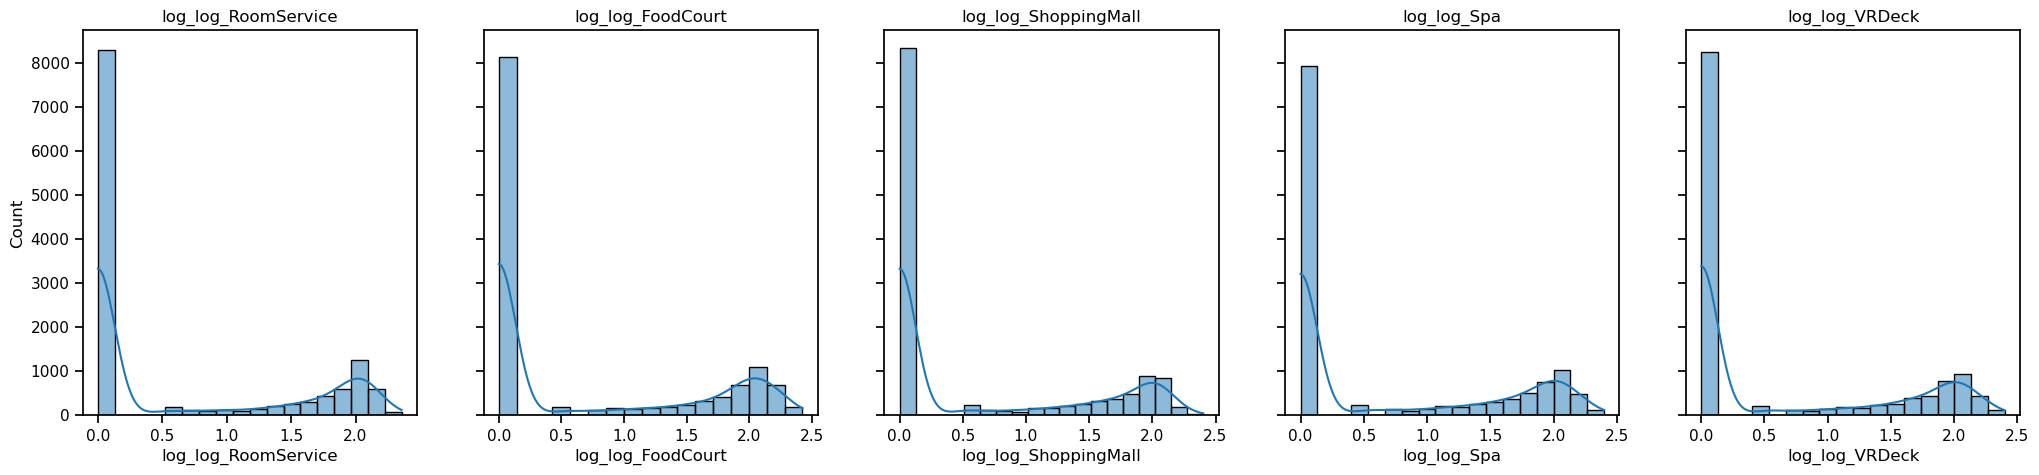

In [44]:
billsPlotter(data=complete, columnList=loglogcols)


In [45]:
complete[loglogcols].skew(), complete[loglogcols].kurtosis()

(log_log_RoomService     0.859304
 log_log_FoodCourt       0.816702
 log_log_ShoppingMall    0.907082
 log_log_Spa             0.770585
 log_log_VRDeck          0.869030
 dtype: float64,
 log_log_RoomService    -1.112094
 log_log_FoodCourt      -1.172610
 log_log_ShoppingMall   -1.002268
 log_log_Spa            -1.223255
 log_log_VRDeck         -1.067233
 dtype: float64)

Skew improved slightly but kurtosis got quite worse. We'll keep these variables with just a single log transformation.

##### 10. Name

In [46]:
complete['Name'].nunique()

12629

Let's extract surnames and see if we can use them

In [47]:
complete['Surname'] = complete['Name'].apply(lambda x: x.split(' ')[-1])
complete[['Name', 'Surname']].head()

,Name,Surname
0,Maham Ofracculy,Ofracculy
1,Juanna Vines,Vines
2,Altark Susent,Susent
3,Solam Susent,Susent
4,Willy Santantines,Santantines


In [48]:
complete['Surname'].nunique()

2406

There is still very high cardinality. These may be used to denote families and used to fill missing values.

##### 11. Transported

This is the target variable

In [49]:
complete['Transported'].value_counts()

True     4378
False    4315
Name: Transported, dtype: int64

Almost symmetrically distributed

In [50]:
complete.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported', 'IsTrain', 'Group', 'GroupSize', 'CabinDeck',
       'CabinNum', 'CabinSide', 'log_RoomService', 'log_FoodCourt',
       'log_ShoppingMall', 'log_Spa', 'log_VRDeck', 'log_log_RoomService',
       'log_log_FoodCourt', 'log_log_ShoppingMall', 'log_log_Spa',
       'log_log_VRDeck', 'Surname'],
      dtype='object')

In [51]:
# drop unwanted columns
complete.drop(columns=['PassengerId', 'Cabin', 'RoomService', 'FoodCourt', 'ShoppingMall'
                       , 'Spa', 'VRDeck', 'Name', 'log_log_RoomService', 'log_log_FoodCourt', 
                       'log_log_ShoppingMall', 'log_log_Spa', 'log_log_VRDeck'], inplace=True)

In [52]:
complete = complete.astype({'Group':'float64', 'CabinDeck':'category', 'CabinNum':'float64',
                        'CabinSide':'category', 'Surname':'category'})

In [53]:
complete.dtypes

HomePlanet          category
CryoSleep           category
Destination         category
Age                  float64
VIP                 category
Transported         category
IsTrain             category
Group                float64
GroupSize              int64
CabinDeck           category
CabinNum             float64
CabinSide           category
log_RoomService      float64
log_FoodCourt        float64
log_ShoppingMall     float64
log_Spa              float64
log_VRDeck           float64
Surname             category
dtype: object

Questions to be answered in Bivariate Analysis:

* Q1 - Do all members of a group get transported together?
* Q2 - Do all members of a group belong to same family?
* Q3 - Is CabinNum correlated to group for every deck?

#### Bivariate Analysis

##### Continuous-Continuous

In [54]:
numerical = complete.select_dtypes(include='number')

<AxesSubplot: >

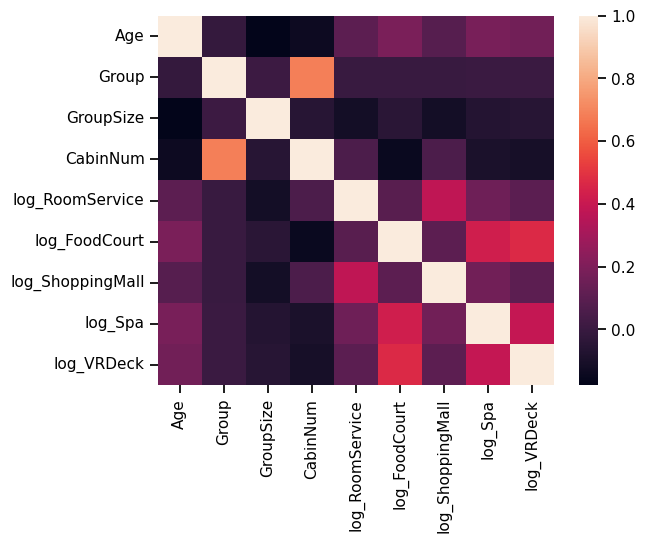

In [57]:
correlation = numerical.corr()
sns.heatmap(correlation)

Three pairs have correlation > 0.4
* Group, CabinNum as expected from Q3
* log_FoodCourt, log_Spa
* log_FoodCourt, log_VRDeck

We will use Factor Analysis to avoid multicollinearity

##### Continuous-Categorical

In [61]:
num_cols = numerical.columns
cat_cols = complete.select_dtypes(exclude = 'number').columns

Do all members of a group get transported together?

In [ ]:
def gini(x):
    if x is None:
        return 1
    i = 0
    j = 0
    for val in x:
        if val == True:
            i = i+1
        else:
            j = j+1
    return (i/(i+j))**2+(j/(i+j))**2

temp = complete.astype({'Group':'category'}) 

# Calculate average Gini purity across all groups
(temp.loc[temp['GroupSize']>1, ['Group', 'Transported']].dropna().groupby(by = ['Group'])['Transported'].aggregate(lambda x: gini(x))).mean()

In [79]:
temp = complete.astype({'Group':'category'}) 

In [85]:
temp.loc[temp['GroupSize']>1, ['Group', 'Transported']].dropna().groupby(by = ['Group'])['Transported'].sum()

TypeError: category type does not support sum operations